<a href="https://colab.research.google.com/github/luisafelixx/Fairness_Diabetes/blob/main/aprendizado_e_fairness_IC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import de Bibliotecas

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.0 MB/s eta 0:00:00


In [ ]:
# Bibliotecas para manipulação de dados
import pandas as pd
import numpy as np

# Bibliotecas para visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas para manipulação de dados e modelagem
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier
#from catboost import CatBoostClassifier
import xgboost as xgb
from catboost import CatBoostClassifier

# Métricas de avaliação
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, classification_report
)

#Métricas de Fairness
from aif360.sklearn.metrics import (
    statistical_parity_difference,
    equal_opportunity_difference,
    average_odds_difference,
    disparate_impact_ratio,

)

#Mitigação
from aif360.datasets import BinaryLabelDataset
from aif360.algorithms.preprocessing import Reweighing
from aif360.metrics import ClassificationMetric
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.algorithms.inprocessing import PrejudiceRemover


pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'
pip install 'aif360[OptimalTransport]'


In [ ]:
data = pd.read_csv('dados_limpos2015.csv')

# Modelos de Aprendizagem

## Histograma Multimétricas

In [ ]:
X = data.drop(columns = ['Diabetes'])
y = data['Diabetes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
modelos = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier(criterion='gini', max_depth=5)),
    ('SVM', SGDClassifier(loss="hinge", random_state=42)),
    ('AdaBoost', AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),
        n_estimators=50,
        learning_rate=1.0,
        random_state=42
    )),
    ('XBoost', xgb.XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    )),
    ('CatBoost', CatBoostClassifier(
        iterations=100,
        learning_rate=0.1,
        depth=6,
        loss_function='Logloss',
        random_seed=42
    ))
]

In [ ]:
resultados = {}

for nome, modelo in modelos:
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    try:
        y_proba = modelo.predict_proba(X_test)[:, 1]
    except AttributeError:
        y_proba = modelo.decision_function(X_test)

    resultados[nome] = {
        'Acurácia': accuracy_score(y_test, y_pred),
        'Precisão': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    }

df_resultados = pd.DataFrame(resultados)

print(df_resultados)



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0:	learn: 0.6079095	total: 99.1ms	remaining: 9.81s
1:	learn: 0.5479018	total: 144ms	remaining: 7.07s
2:	learn: 0.5023386	total: 213ms	remaining: 6.87s
3:	learn: 0.4661481	total: 264ms	remaining: 6.34s
4:	learn: 0.4392728	total: 306ms	remaining: 5.81s
5:	learn: 0.4175959	total: 345ms	remaining: 5.4s
6:	learn: 0.4007217	total: 389ms	remaining: 5.17s
7:	learn: 0.3895873	total: 428ms	remaining: 4.92s
8:	learn: 0.3801493	total: 465ms	remaining: 4.7s
9:	learn: 0.3726861	total: 512ms	remaining: 4.61s
10:	learn: 0.3658627	total: 557ms	remaining: 4.51s
11:	learn: 0.3612587	total: 625ms	remaining: 4.59s
12:	learn: 0.3570960	total: 668ms	remaining: 4.47s
13:	learn: 0.3541987	total: 707ms	remaining: 4.34s
14:	learn: 0.3514331	total: 752ms	remaining: 4.26s
15:	learn: 0.3491151	total: 799ms	remaining: 4.2s
16:	learn: 0.3471863	total: 843ms	remaining: 4.11s
17:	learn: 0.3453208	total: 884ms	remaining: 4.03s
18:	learn: 0.3442864	total: 927ms	remaining: 3.95s
19:	learn: 0.3432559	total: 975ms	remaining

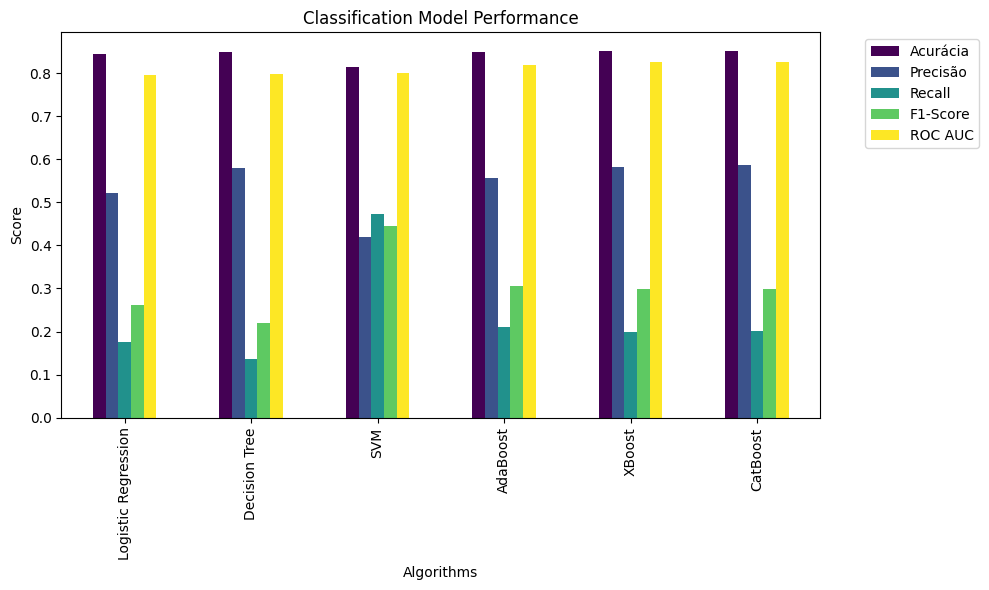

In [ ]:
df_resultados = df_resultados.T
df_resultados.plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("Classification Model Performance")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Algorithms")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

# Verificação Vieses


## Metricas Fairness

In [ ]:


def fairness_report(y_test, y_pred, prot_attr, privileged_values=None, return_df=True):
    report = {
        prot_attr: {
            'disparate_impact_ratio': disparate_impact_ratio(y_test, y_pred, prot_attr=prot_attr),
            'equal_opportunity_difference': equal_opportunity_difference(y_test, y_pred, prot_attr=prot_attr),
            'statistical_parity_difference': statistical_parity_difference(y_test, y_pred, prot_attr=prot_attr),
            'average_odds_difference': average_odds_difference(y_test, y_pred, prot_attr=prot_attr),
            'accuracy': accuracy_score(y_test, y_pred)
        }
    }

    if return_df:
        return pd.DataFrame(report)
    else:
        return report


## Sexo

In [ ]:
dados_sexo = data.set_index('Sexo')

In [ ]:
x = dados_sexo.drop(columns=['Diabetes'])
y = dados_sexo['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
report= fairness_report(y_test, y_pred, prot_attr='Sexo', privileged_values=[1])
print(report)

                                   Sexo
disparate_impact_ratio         1.283018
equal_opportunity_difference   0.060206
statistical_parity_difference  0.012238
average_odds_difference        0.033348
accuracy                       0.844779


In [ ]:
x = dados_sexo.drop(columns=['Diabetes'])
y = dados_sexo['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

dtree = DecisionTreeClassifier(criterion='gini', max_depth=5)

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

In [ ]:
report = fairness_report(y_test, y_pred, prot_attr='Sexo',  privileged_values=[1])
print(report)

                                   Sexo
disparate_impact_ratio         1.070257
equal_opportunity_difference   0.028855
statistical_parity_difference  0.002485
average_odds_difference        0.014587
accuracy                       0.848319


In [ ]:
x = dados_sexo.drop(columns=['Diabetes'])
y = dados_sexo['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

svm = SGDClassifier(loss="hinge", random_state=42)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)



In [ ]:
report = fairness_report(y_test, y_pred, prot_attr='Sexo', privileged_values=[1])
print(report)

                                   Sexo
disparate_impact_ratio         1.212961
equal_opportunity_difference   0.005850
statistical_parity_difference  0.001495
average_odds_difference        0.003575


In [ ]:
x = dados_sexo.drop(columns=['Diabetes'])
y = dados_sexo['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

cb = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    random_seed=42
)

cb.fit(X_train, y_train)

y_pred = cb.predict(X_test)



0:	learn: 0.6088794	total: 114ms	remaining: 11.3s
1:	learn: 0.5426735	total: 226ms	remaining: 11.1s
2:	learn: 0.4961853	total: 264ms	remaining: 8.55s
3:	learn: 0.4624436	total: 305ms	remaining: 7.31s
4:	learn: 0.4362346	total: 349ms	remaining: 6.63s
5:	learn: 0.4173585	total: 388ms	remaining: 6.08s
6:	learn: 0.4021487	total: 425ms	remaining: 5.64s
7:	learn: 0.3902130	total: 465ms	remaining: 5.35s
8:	learn: 0.3805916	total: 506ms	remaining: 5.12s
9:	learn: 0.3728965	total: 555ms	remaining: 5s
10:	learn: 0.3667742	total: 598ms	remaining: 4.84s
11:	learn: 0.3615315	total: 643ms	remaining: 4.72s
12:	learn: 0.3575930	total: 684ms	remaining: 4.58s
13:	learn: 0.3548141	total: 725ms	remaining: 4.46s
14:	learn: 0.3521576	total: 769ms	remaining: 4.36s
15:	learn: 0.3500032	total: 808ms	remaining: 4.24s
16:	learn: 0.3481772	total: 858ms	remaining: 4.19s
17:	learn: 0.3468651	total: 899ms	remaining: 4.09s
18:	learn: 0.3452748	total: 939ms	remaining: 4s
19:	learn: 0.3437245	total: 987ms	remaining: 3.

In [ ]:
report_lg = fairness_report(y_test, y_pred, prot_attr='Sexo',  privileged_values=[1])
print(report_lg)

                                   Sexo
disparate_impact_ratio         1.217606
equal_opportunity_difference   0.056242
statistical_parity_difference  0.010569
average_odds_difference        0.031217


In [ ]:
x = dados_sexo.drop(columns=['Diabetes'])
y = dados_sexo['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

In [ ]:
report = fairness_report(y_test, y_pred, prot_attr='Sexo',  privileged_values=[1])
print(report)

                                   Sexo
disparate_impact_ratio         1.166129
equal_opportunity_difference   0.048535
statistical_parity_difference  0.009325
average_odds_difference        0.027449


In [ ]:
x = dados_sexo.drop(columns=['Diabetes'])
y = dados_sexo['Diabetes']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)


In [ ]:
report = fairness_report(y_test, y_pred, prot_attr='Sexo',  privileged_values=[1])
print(report)

                                   Sexo
disparate_impact_ratio         1.249160
equal_opportunity_difference   0.056694
statistical_parity_difference  0.011588
average_odds_difference        0.031955


## Etnia

Binarizando Etnia

In [ ]:
data['Etnia'] = data['Etnia'].map({1: 1, 2: 0, 3: 0, 4: 0, 5: 0})

In [ ]:
data.value_counts('Etnia')

,count
Etnia,
1,201886
0,49581


Etnia binarizada - brancos 1 / não brancos 0

In [ ]:
data_etnia = data.set_index('Etnia')

In [ ]:
x = data_etnia.drop(columns=['Diabetes'])
y = data_etnia['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
report= fairness_report(y_test, y_pred, prot_attr='Etnia', privileged_values=[1])
print(report)

                                  Etnia
disparate_impact_ratio         1.780254
equal_opportunity_difference   0.047832
statistical_parity_difference  0.034151
average_odds_difference        0.032972
accuracy                       0.844607


In [ ]:
x = data_etnia.drop(columns=['Diabetes'])
y = data_etnia['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

dtree = DecisionTreeClassifier(criterion='gini', max_depth=5)

dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

In [ ]:
report = fairness_report(y_test, y_pred, prot_attr='Etnia',  privileged_values=[1])
print(report)

                                  Etnia
disparate_impact_ratio         1.741552
equal_opportunity_difference   0.032857
statistical_parity_difference  0.023789
average_odds_difference        0.021832
accuracy                       0.848319


In [ ]:
x = data_etnia.drop(columns=['Diabetes'])
y = data_etnia['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

svm = SGDClassifier(loss="hinge", random_state=42)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)



In [ ]:
report = fairness_report(y_test, y_pred, prot_attr='Etnia', privileged_values=[1])
print(report)

                                  Etnia
disparate_impact_ratio         1.191053
equal_opportunity_difference   0.001583
statistical_parity_difference  0.044906
average_odds_difference        0.010031


In [ ]:
x = data_etnia.drop(columns=['Diabetes'])
y = data_etnia['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

cb = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    random_seed=42
)

cb.fit(X_train, y_train)

y_pred = cb.predict(X_test)



0:	learn: 0.6059758	total: 50.6ms	remaining: 5.01s
1:	learn: 0.5434623	total: 90.8ms	remaining: 4.45s
2:	learn: 0.4977795	total: 132ms	remaining: 4.27s
3:	learn: 0.4621199	total: 172ms	remaining: 4.13s
4:	learn: 0.4361487	total: 253ms	remaining: 4.8s
5:	learn: 0.4190319	total: 331ms	remaining: 5.18s
6:	learn: 0.4025623	total: 409ms	remaining: 5.43s
7:	learn: 0.3902236	total: 526ms	remaining: 6.05s
8:	learn: 0.3810927	total: 631ms	remaining: 6.38s
9:	learn: 0.3732042	total: 753ms	remaining: 6.78s
10:	learn: 0.3675471	total: 872ms	remaining: 7.06s
11:	learn: 0.3623911	total: 989ms	remaining: 7.25s
12:	learn: 0.3586284	total: 1.1s	remaining: 7.36s
13:	learn: 0.3553437	total: 1.18s	remaining: 7.23s
14:	learn: 0.3528321	total: 1.28s	remaining: 7.27s
15:	learn: 0.3508839	total: 1.4s	remaining: 7.37s
16:	learn: 0.3489983	total: 1.52s	remaining: 7.41s
17:	learn: 0.3474058	total: 1.58s	remaining: 7.22s
18:	learn: 0.3460490	total: 1.7s	remaining: 7.26s
19:	learn: 0.3446847	total: 1.83s	remaining

In [ ]:
report_lg = fairness_report(y_test, y_pred, prot_attr='Etnia',  privileged_values=[1])
print(report_lg)

                                  Etnia
disparate_impact_ratio         1.703805
equal_opportunity_difference   0.038235
statistical_parity_difference  0.032049
average_odds_difference        0.026871


In [ ]:
x = data_etnia.drop(columns=['Diabetes'])
y = data_etnia['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

In [ ]:
report = fairness_report(y_test, y_pred, prot_attr='Etnia',  privileged_values=[1])
print(report)

                                  Etnia
disparate_impact_ratio         1.326588
equal_opportunity_difference   0.001502
statistical_parity_difference  0.021186
average_odds_difference        0.004739


In [ ]:
x = data_etnia.drop(columns=['Diabetes'])
y = data_etnia['Diabetes']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)


In [ ]:
report = fairness_report(y_test, y_pred, prot_attr='Etnia',  privileged_values=[1])
print(report)

                                  Etnia
disparate_impact_ratio         1.670380
equal_opportunity_difference   0.035653
statistical_parity_difference  0.031003
average_odds_difference        0.025200
